# Diamond EP Grouping by Resolution Limit - Residuals

To better identify the relation between features, the residuals between pair of features ought to be analysed.

If these residuals appear random, then there is no likely relation between the features, however, if they do appear to show some pattern, then that pattern might indicate the real relation between the pair.

In [3]:
import sys
dirpath = r'C:\Users\César\PycharmProjects\Diamond_ML'
if dirpath not in sys.path:
    sys.path.insert(0, dirpath)
from read_data import data, pd, np, plt, plot_original_data
plt.style.use("ggplot")

DIALS


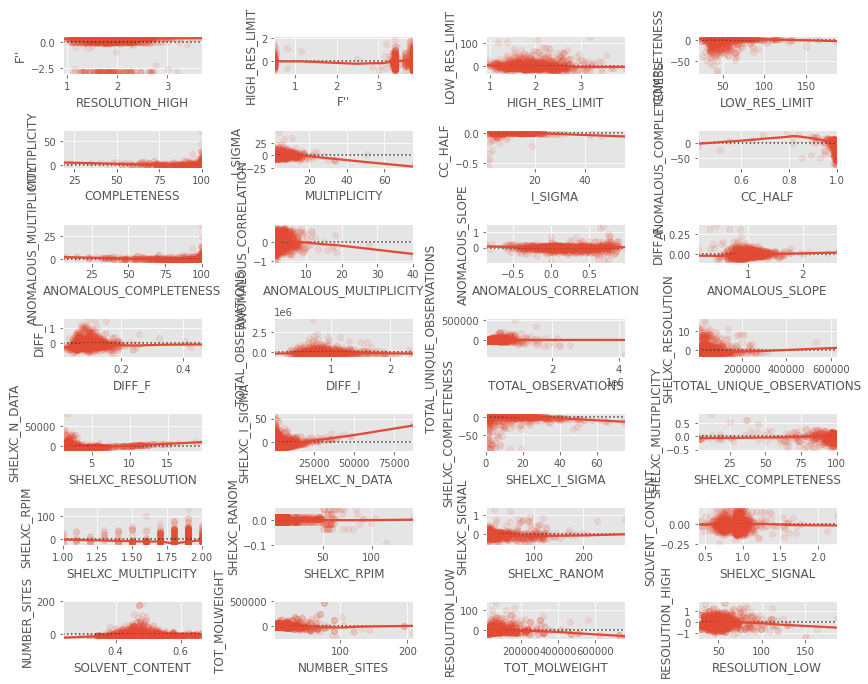

------------------------------------------------------------
3DII


C:\Anaconda\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


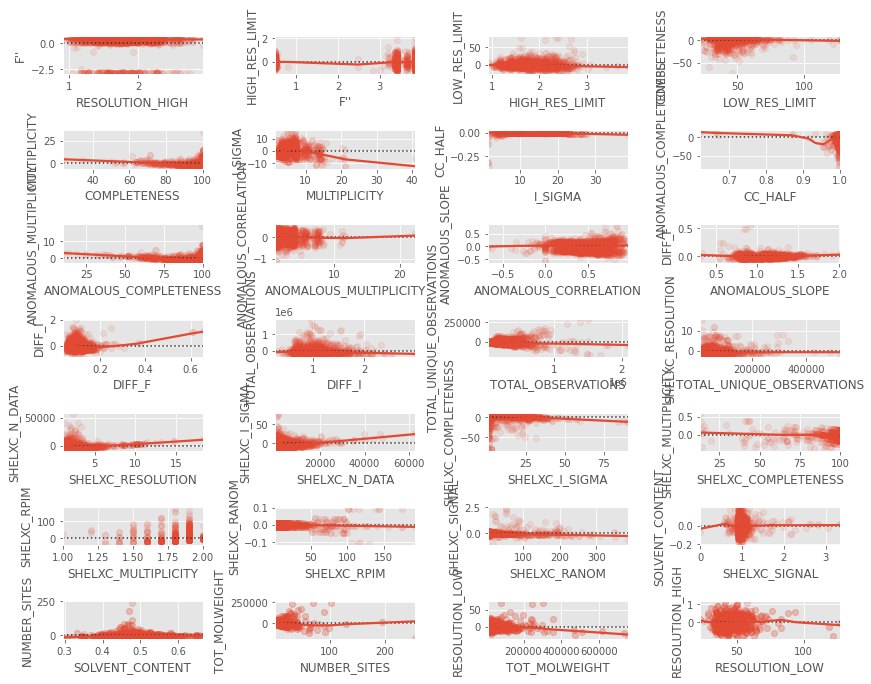

------------------------------------------------------------


In [9]:
import seaborn as sns


for db_kind, datum in data.items():
    print(db_kind.upper())
    r_etc = ["RMERGE_I", "RMERGE_DIFF_I", "RMEAS_I", "RMEAS_DIFF_I", "RPIM_I", "RPIM_DIFF_I"]
    x, y, union = datum.unpack(drop_col=["DATASET_id", "SHELXC_CFOM"] + r_etc, union=True)

    # take only untouched data
    i = 1
    mask = x["DATASET_NAME"] == i
    x, y, = x[mask], y[mask]

    # drop not needed columns
    x = x.drop(["DATASET_NAME", "SPACEGROUP"], axis=1)
    union = pd.concat([x, y], axis=1)
    
    # prepare figure with custom layout
    n_feats = len(x.columns)
    ncols = 4
    nrows = n_feats // ncols + 1
    fig = plt.figure(figsize=(12, 10))
    gs = fig.add_gridspec(nrows=nrows, ncols=ncols)
    
    # add each plot to figure grid
    for i in range(n_feats):
        hfeat, vfeat = x.columns[i-1], x.columns[i]
        n_row = i // ncols
        n_col = i % ncols
        ax = fig.add_subplot(gs[n_row, n_col])
        legend = True if i == 0 else False
        scatter_kws = dict(alpha=0.1)
        sns.residplot(data=union, x=hfeat, y=vfeat, lowess=True, ax=ax, scatter_kws=scatter_kws)
    
    plt.tight_layout()
    plt.show()
    print("-"*60)

DIALS


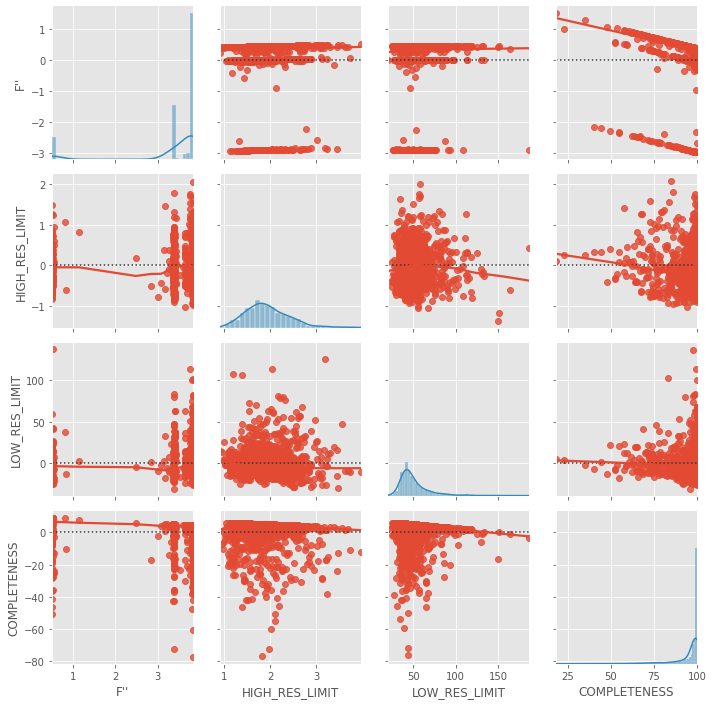

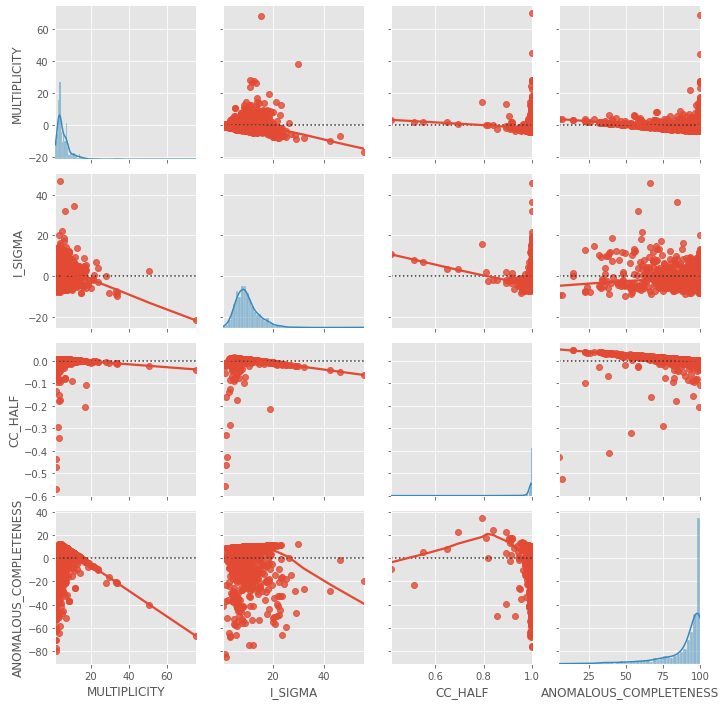

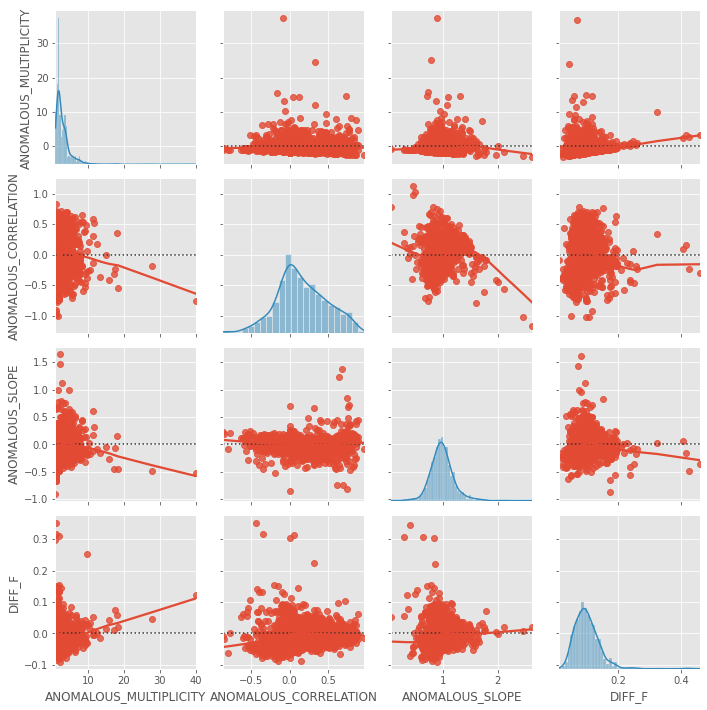

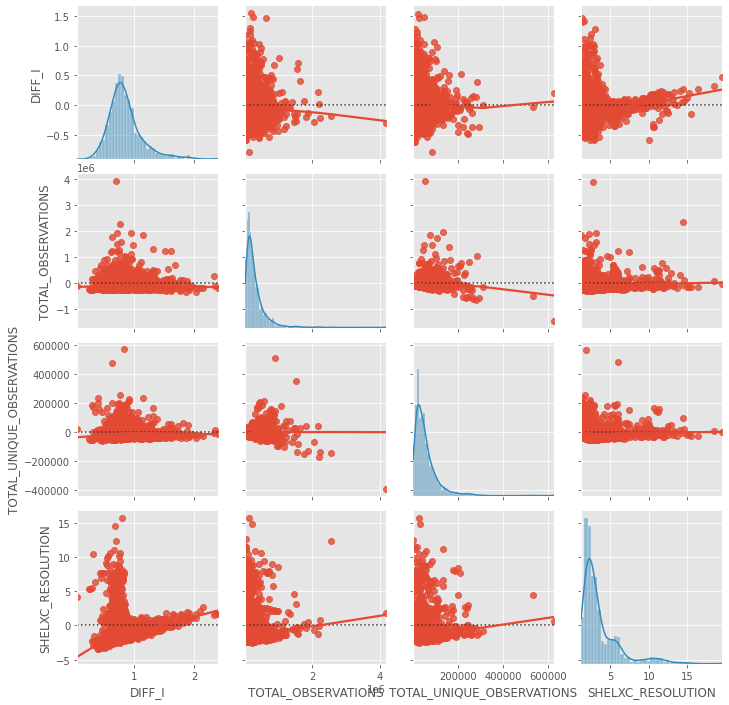

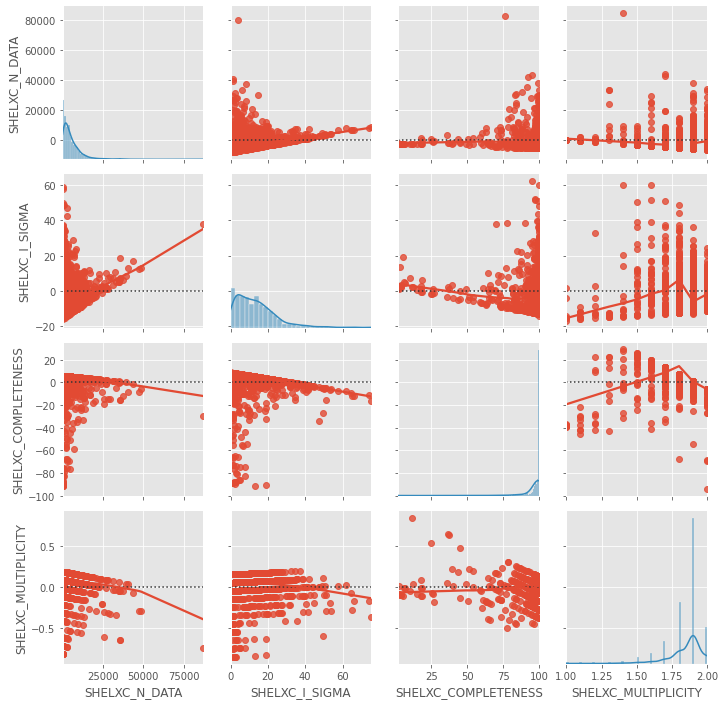

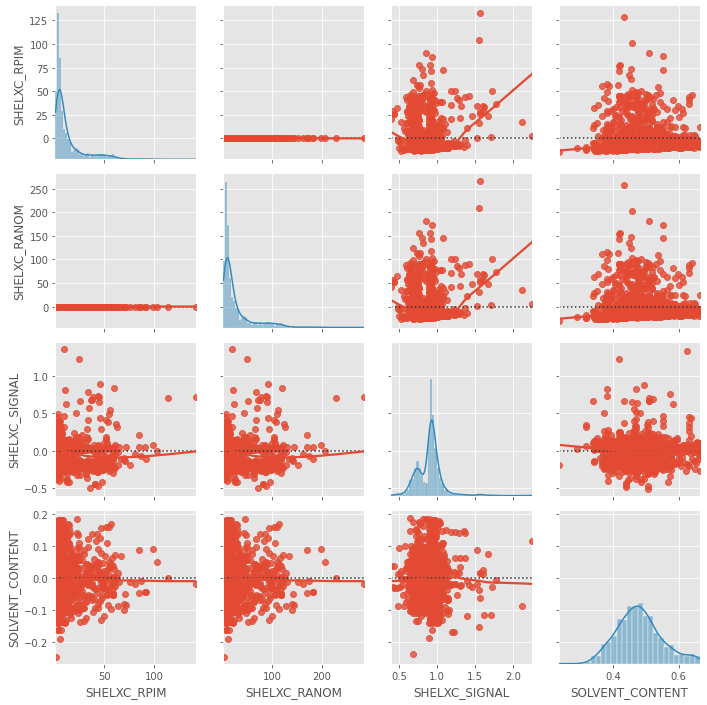

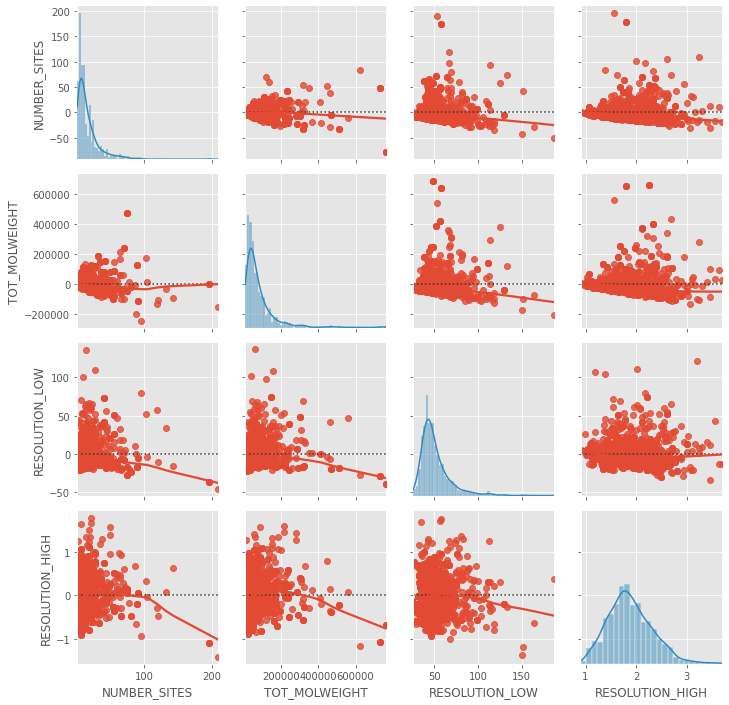

3DII


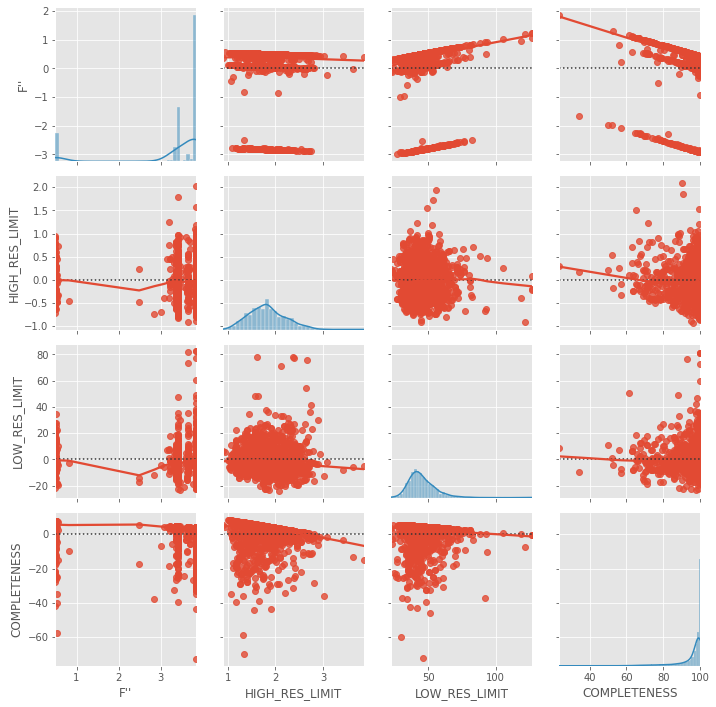

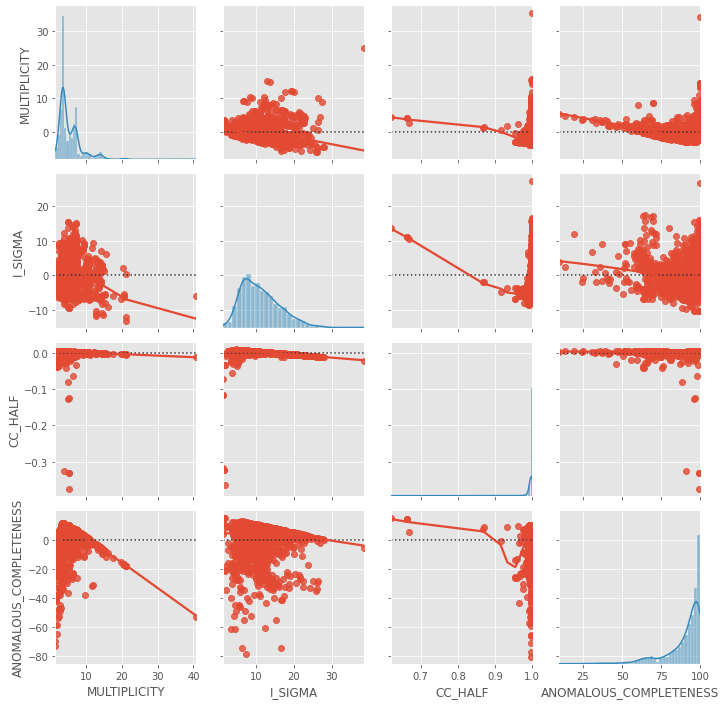

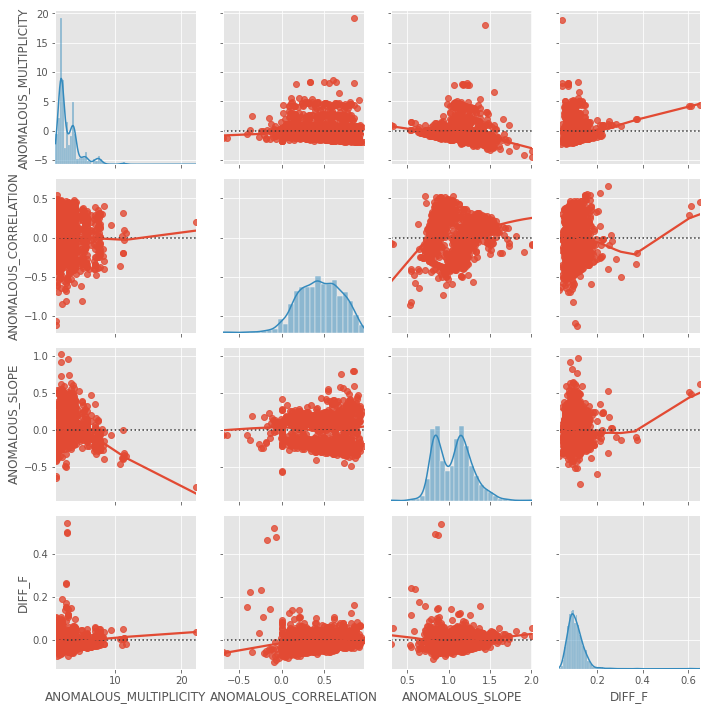

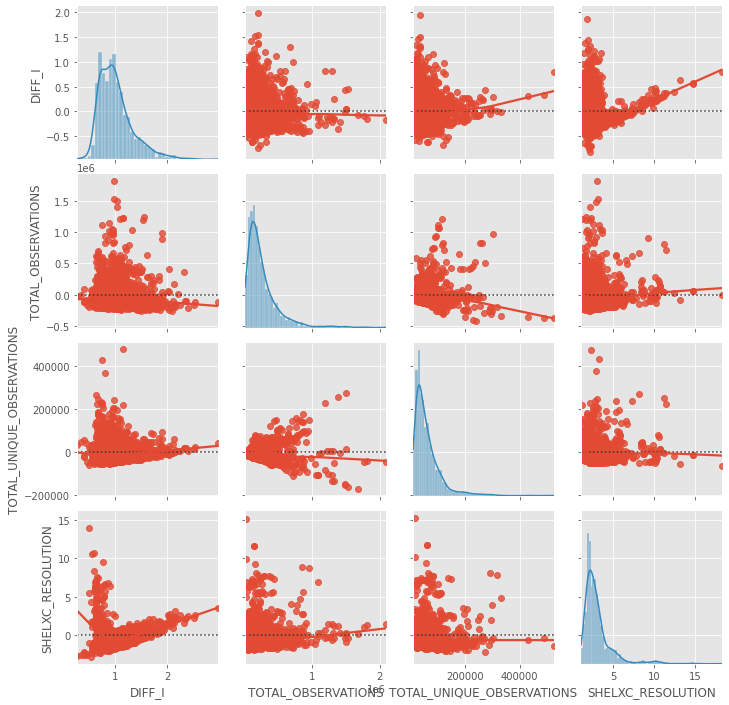

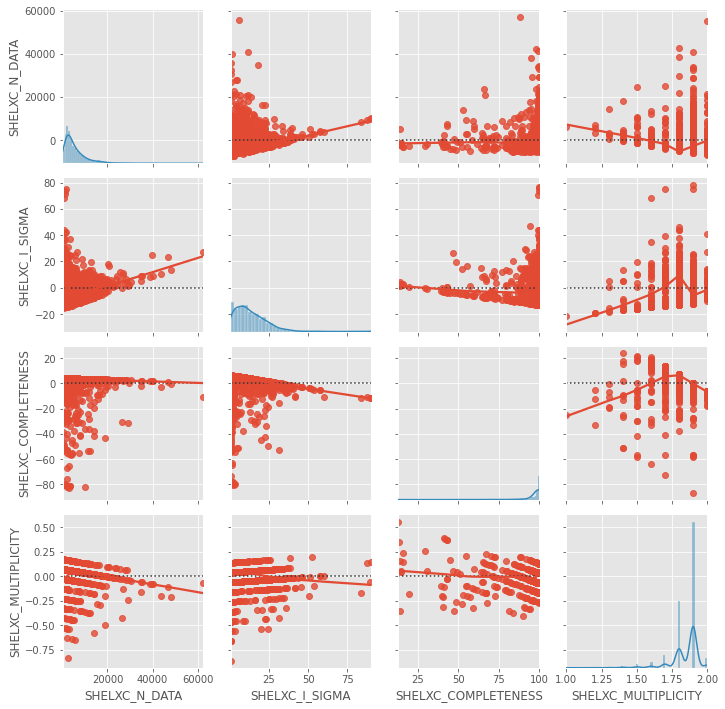

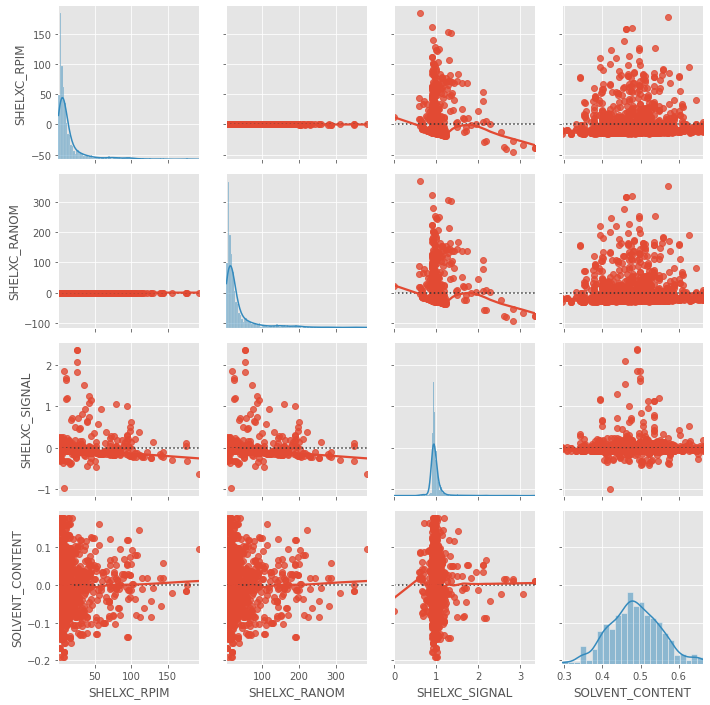

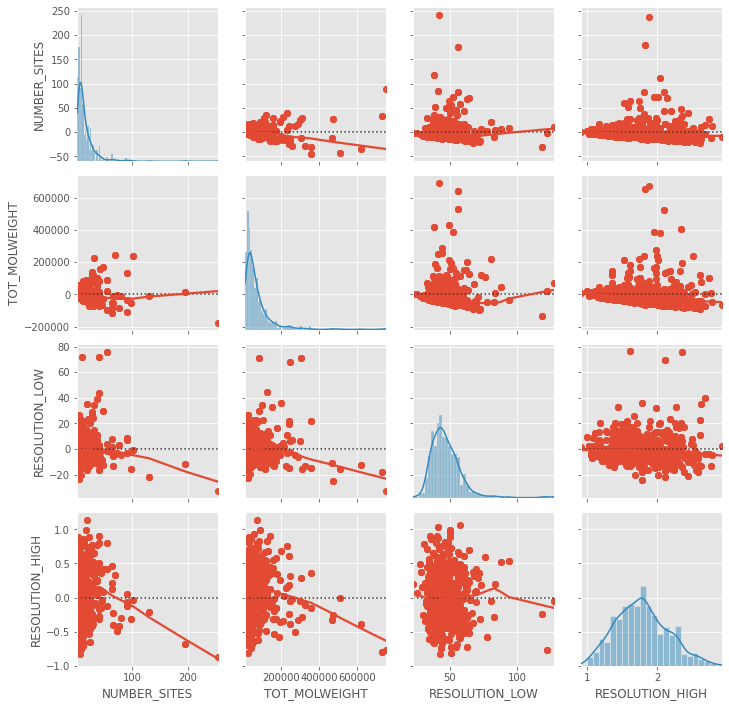

In [11]:
import seaborn as sns


for db_kind, datum in data.items():
    print(db_kind.upper())
    r_etc = ["RMERGE_I", "RMERGE_DIFF_I", "RMEAS_I", "RMEAS_DIFF_I", "RPIM_I", "RPIM_DIFF_I"]
    x, y, union = datum.unpack(drop_col=["DATASET_id", "SHELXC_CFOM"] + r_etc, union=True)

    # take only untouched data
    i = 1
    mask = x["DATASET_NAME"] == i
    x, y, = x[mask], y[mask]

    # drop not needed columns
    x = x.drop(["DATASET_NAME", "SPACEGROUP"], axis=1)
    union = pd.concat([x, y], axis=1)

    size = 4
    for i in range(0, len(x.columns), size):
        x_part = x.iloc[:, i:i+size]
        
        g = sns.PairGrid(x_part)
        g.map_diag(sns.histplot, kde=True)
        g.map_offdiag(sns.residplot, lowess=True)
        
        plt.show()

A partial linear fit was done on all of the residuals, using the "lowess" parameter. This lowess indicates the general behaviour of the residuals - if it is above/bellow the 0 line, and seems to follow some pattern, then the underlying x/y are related by some way other than randomly (or linearly).

However, most lowess curves, in the "main" region of each plot, are located mainly at 0, and show no clear pattern. In fact, the only variation from 0 is at the extremes, where outliers dominate.

The f''-completeness residuals stand out, however I personally believe they just show that a different linear fit slope should be chosen, due to the discrete nature of f''. No obvious pattern is visible.

As such, its safe to assume there is **no obvious/trivial relation between features** (except variations of the same, such as completeness/multiplicity, which were previously confirmed to be highly correlated).

DIALS


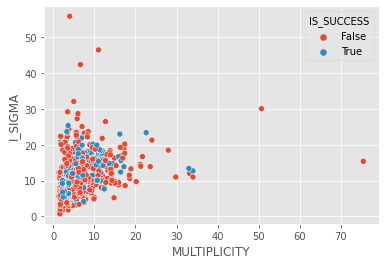

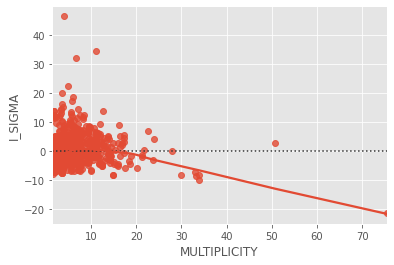

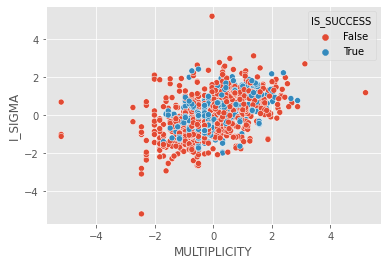

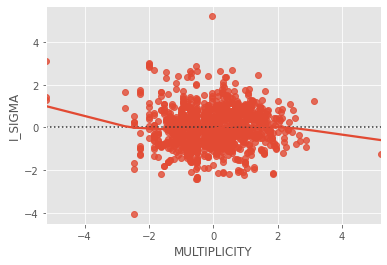

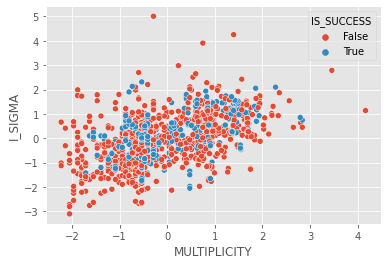

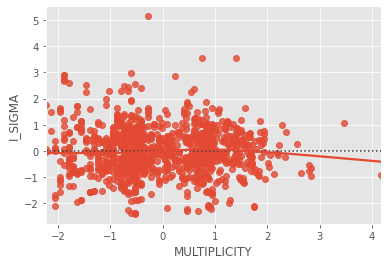

------------------------------------------------------------
3DII


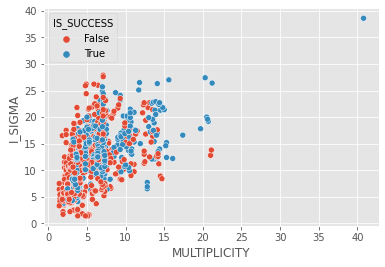

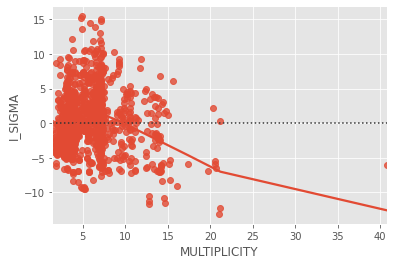

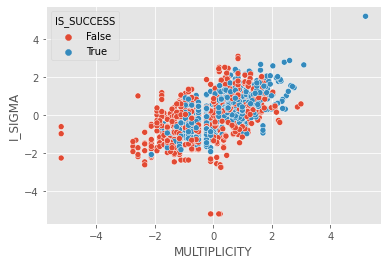

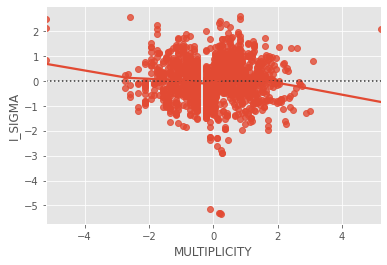

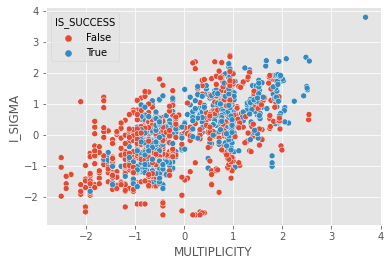

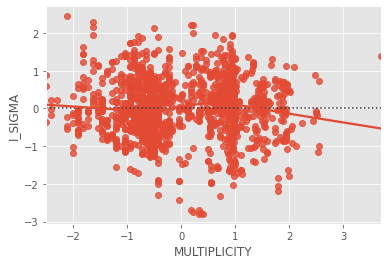

------------------------------------------------------------


In [27]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler


for db_kind, datum in data.items():
    print(db_kind.upper())
    r_etc = ["RMERGE_I", "RMERGE_DIFF_I", "RMEAS_I", "RMEAS_DIFF_I", "RPIM_I", "RPIM_DIFF_I"]
    x, y, union = datum.unpack(drop_col=["DATASET_id", "SHELXC_CFOM"] + r_etc, union=True)

    # take only untouched data
    i = 1
    mask = x["DATASET_NAME"] == i
    x, y, = x[mask], y[mask]

    # drop not needed columns
    x = x.drop(["DATASET_NAME", "SPACEGROUP"], axis=1)
    union = pd.concat([x, y], axis=1)

    # plot relevant figs
    sns.scatterplot(data=union, x="MULTIPLICITY", y="I_SIGMA", hue="IS_SUCCESS")
    plt.show()
    sns.residplot(data=union, x="MULTIPLICITY", y="I_SIGMA", lowess=True)
    plt.show()
    
    
    # transform data - Quantile
    x_trsf = QuantileTransformer(output_distribution="normal").fit_transform(x)
    x_trsf = pd.DataFrame(x_trsf, index=x.index, columns=x.columns)
    union_trsf = pd.concat([x_trsf, y], axis=1)
    
    # plot relevant figs
    sns.scatterplot(data=union_trsf, x="MULTIPLICITY", y="I_SIGMA", hue="IS_SUCCESS")
    plt.show()
    sns.residplot(data=union_trsf, x="MULTIPLICITY", y="I_SIGMA", lowess=True)
    plt.show()
    
    
    # transform data
    x_trsf = PowerTransformer(method="yeo-johnson").fit_transform(StandardScaler(with_std=False).fit_transform(x))
    x_trsf = pd.DataFrame(x_trsf, index=x.index, columns=x.columns)
    union_trsf = pd.concat([x_trsf, y], axis=1)
    
    # plot relevant figs
    sns.scatterplot(data=union_trsf, x="MULTIPLICITY", y="I_SIGMA", hue="IS_SUCCESS")
    plt.show()
    sns.residplot(data=union_trsf, x="MULTIPLICITY", y="I_SIGMA", lowess=True)
    plt.show()
    
    print("-"*60)